# Deceptive Business Reviews
## <font color='orange'>  Text Data Analysis and Predictions </font>

---
### Lilit Petrosyan

![](hotel_review.png)


In [17]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Situation

Hotels' revenue is increasingly tied to publicly available customer reviews, but some reviews may be deceptive. 

* **Role:** Vice President of Customer Service at a large hotel.
* **Decision:** Invest in addressing deceptive customer reviews?
* **Approach:** Build and use a model to predict truthful vs. deceptive reviews, and form strategy accordingly.
* **Datasets:** 
  * The hotel reviews with ratings dataset is a sample of a larger data set, available from Datafiniti. 
  * The hotel reviews with truthful vs. deceptive classification dataset comprises reviews of 20 Chicago hotels. The data is described in two papers according to the sentiment of the review
    1. M. Ott, Y. Choi, C. Cardie, and J.T. Hancock. 2011. Finding Deceptive Opinion Spam by Any Stretch of the Imagination. In Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies.
    2.  M. Ott, C. Cardie, and J.T. Hancock. 2013. Negative Deceptive Opinion Spam. In Proceedings of the 2013 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies.

## Data

### Test Data

A dataset of hotel reviews:

In [19]:
data.test.all = read.csv("Hotel Reviews.csv")

size(data.test.all)
head(data.test.all)

observations,variables
35912,19


address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
Riviera San Nicol 11/a,Hotels,Mableton,US,45.42161,12.37619,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NA,NA,4,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,Good location away from the crouds,,Russ (kent),
Riviera San Nicol 11/a,Hotels,Mableton,US,45.42161,12.37619,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NA,NA,5,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,Great hotel with Jacuzzi bath!,,A Traveler,
Riviera San Nicol 11/a,Hotels,Mableton,US,45.42161,12.37619,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NA,NA,5,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,Lugnt lï¿½ï¿½ge,,Maud,
Riviera San Nicol 11/a,Hotels,Mableton,US,45.42161,12.37619,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NA,NA,5,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",Good location on the Lido.,,Julie,
Riviera San Nicol 11/a,Hotels,Mableton,US,45.42161,12.37619,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NA,NA,5,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,,sungchul,
Riviera San Nicol 11/a,Hotels,Mableton,US,45.42161,12.37619,Hotel Russo Palace,30126,GA,2015-04-05T00:00:00Z,2016-10-24T00:00:25Z,NA,NA,5,"We loved staying on the island of Lido! You need to take a water is from Venice to get there. From the train station, a boat ride takes 45 minutes but has beautiful views along the way. Hotel is an EASY walk from the boat dock. The room was very clean and the breakfast was plentiful. We would definitely recommend this hotel!",Very nice hotel,,A Traveler,


A subset of just the Alexandrian hotel reviews:

In [20]:
hotel_name = names(which.max(table(data.test.all$name)))
data.test = data.test.all[data.test.all$name==hotel_name,]

size(data.test)
head(data.test)

observations,variables
1185,19


,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
4745,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2013-08-25T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,5,The hotel was great. Staff went above and beyond bringing hot tea to room at 11:30 pm at no charge!,Wonderful,,A verified traveler,
4746,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2010-08-26T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,4,"A wonderful hotel - would definitely stay there whenever we are in Alexandria again. Wonderful staff. We remarked that the first room was very far from the elevator, and they immediately moved us to a much nicer/larger room across from the elevator without question. I hope I am able to stay at a Kimpton Hotel on future trips.",Beautiful Hotel with wonderful service.,,A verified traveler,
4747,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2014-10-17T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,5,"Tolles Zimmer, nettes Personal",Sehr schï¿½ï¿½nes Hotel,,Jennifer,Hamburg
4748,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2012-06-09T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,5,Outstanding. Will definitely return.,Wonderful hotel in a terrific location,,A verified traveler,Hamburg
4749,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2014-06-10T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,3,"O hotel ï¿½ï¿½ belï¿½ï¿½ssimo, assim como os quartos, os quais sï¿½ï¿½o enormes e bastante confortï¿½ï¿½veis.A localizaï¿½ï¿½ï¿½ï¿½o ï¿½ï¿½ excelente; o hotel fica na rua principal de Alexandria.Hï¿½ï¿½ transfer gratuito aeroporto-hotel e vice versa.Sï¿½ï¿½ ha internet free no lobby do hotel e o acesso ao computador e impressora ï¿½ï¿½ pago, o que acho um inconveniente.Tivemos alguns probleminhas com o serviï¿½ï¿½o do hotel, os quais demonstraram a falta de preparo dos funcionï¿½ï¿½rios.Nos disseram que uma encomenda da Amazon nï¿½ï¿½o tinha chegado, quando na verdade jï¿½ï¿½ tinha sido entregue ha mais de 5 dias.Uma meia sumiu do banheiro e nï¿½ï¿½o nos deram qualquer satisfaï¿½ï¿½ï¿½ï¿½o, nem se mostraram preocupados com o ocorrido. Fomos embora sem que nada fosse resolvido.Tivemos indisposiï¿½ï¿½ï¿½ï¿½o apï¿½ï¿½s um jantar no restaurante do hotel.Por essas razï¿½ï¿½es, a estadia acabou nï¿½ï¿½o sendo satisfatï¿½ï¿½ria.",Hospedagem com alguns inconvenientes,,Tercio F,Salvador Bahia Brasil
4750,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2014-04-28T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,4,"I needed a place to stay in VA that was close to or in Alexandria and the Monaco was available for a great value. I enjoyed my stay, room was comfortable and clean. Was disappointed on parking cost but I was able to work around that. Very convenient to old town.",DC for the week,,David,Alexandria VA


Exploratory data analysis:

In [21]:
data.frame(poor_reviews = length(which(data.test$reviews.rating<=3)) / nrow(data.test))

poor_reviews
0.1105485


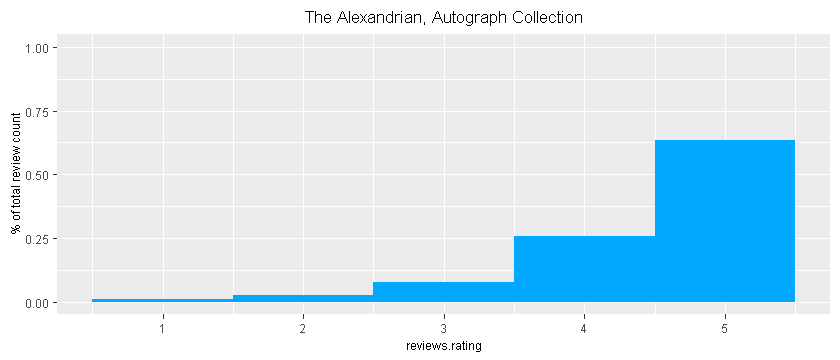

In [22]:
ggplot(data.test) + ggtitle(hotel_name) + ylim(0,1) +
geom_histogram(aes(x=reviews.rating, y=stat(count/sum(count))), bins=5) +
ylab("% of total review count")

### Training Data

A dataset of truthful and deceptive hotel reviews, with classifications:

In [23]:
data.train = read.csv("deceptive-opinion.csv")
size(data.train)

observations,variables
1600,5


A sample of truthful positive reviews:

In [24]:
head(data.train[data.train$deceptive=="truthful" & data.train$polarity=="positive",])

deceptive,hotel,polarity,source,text
truthful,conrad,positive,TripAdvisor,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago..."
truthful,hyatt,positive,TripAdvisor,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed."
truthful,hyatt,positive,TripAdvisor,"This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Parking, as is usual for Chicago, was expensive but we were able to get our car out quickly (however, we left on a Sunday morning, not exactly a high traffic time although it was a Bears homegame day, so a bit busier than usual I would think). No problems at all and the best part is that we got a rate of $100 through Hotwire, a downright steal for this area of Chicago and the quality of the hotel."
truthful,omni,positive,TripAdvisor,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property!"
truthful,hyatt,positive,TripAdvisor,"I asked for a high floor away from the elevator and that is what I got. The room was pleasantly decorated, functional and very clean. I didn't need a whole lot of service but when I did they were pleasant and prompt. I used the fitness center which was well equipped and everything was in working order. It is in a great location at one end of the Michigan Avenue shopping district."
truthful,omni,positive,TripAdvisor,"I stayed at the Omni for one night following a business meeting at another downtown Chicago hotel. I was completely impressed by the service; all personnel during my stay were absolutely outstanding. I checked in quite early (no problem) and was efficiently checked in. My room had a somewhat heavy scent of air freshener (the ONLY negative from the entire stay), which was managed reasonably well by opening the windows. I don't generally require much during my hotel stays, but suffice to say the doorman, housekeeping, the night manager and bartender at 676, the day waiter at 676, and the concierge were amazing - I never waited more than about 30 seconds for anything. The room was ve

A sample of truthful negative reviews:

In [25]:
head(data.train[data.train$deceptive=="truthful" & data.train$polarity=="negative",])

,deceptive,hotel,polarity,source,text
801,truthful,conrad,negative,Web,"Booked a room w/ a queen bed for 2 nights for a wonderful NYE, and was rather disappointed. Bed was either the world's smallest queen, or was actually a double, not to mention it was uncomfortably springy. Some of the things in the bathroom had been previously opened and used (q-tips). Lots of noise seemed to carry through the vents as we could hear other rooms rather clearly. When the tv was off, there was a very audible high-pitched humming noise that we could not get rid of unless we unplugged the tv. Hot water was very inconsistent in the shower. It is in a great location, however, next time I will try one of the other hotels in the area like the Intercontinental or Marriott. This might not be too bad if you are passing though quickly on business, but I wouldn't recommend it for a romantic night or two."
802,truthful,hyatt,negative,Web,"I arrived and my friends were already there and visiting a nearby art gallery. They put my name on the reservation and told me to get a key from the front desk when I arrived. The front desk staff gave me the key to my room and I put my stuff away and went to meet the group. We returned late that night and I soon realized the room that my friends were in was not the room that I placed my stuff in that afternoon. We went to speak with the front desk. We were met with 'We can't do anything about that right now due to the hour. We will not disrupt the guest staying in the room you say you left your stuff in.' Unacceptable!!! My $1500 laptop and all of the things I brought with me were in that room! Not my mistake! FINALLY, after arguing with the head of security for about 30 minutes, they knocked on the door of the room I had left my belongings in and a lady answered. She was upset and stated she had security take the items from her room in the afternoon. All of my belongings were recovered in the security room; however, all of this hullabaloo could have been avoided had they communicated about the situation! Terrible, terrible customer service. They sent up an apology letter, champagne, and chocolate covered strawberries to the room. Although I was appreciative of the gesture, it still does not excuse the fact that they argued and continued to say 'We can't do anything about it.'"
803,truthful,hyatt,negative,Web,"This was the 2nd time that we have stayed at the Hyatt Regency Chicago. The first time was far above our expectations for a $69/per night room. The rooms are very nice, and the beds are comfortable. This time we got a great rate through travelzoo @ $104/ night for a room with a view. We were aware of the $41 parking per night. The first night we got there the valet was yelling at us and said that we couldn't park they were full. We had no clue where to park at this point and had to drive around for over 45 minutes looking at closed parking garages. (It was a Saturday evening) Finally found a spot and were told that it would be $38. This was 6 blocks from the hotel. Mind you its -6 outside and we have luggage to carry too. Not very good service for a 5-star hotel. We got inside and apparently they were running a nightclub out of thier lobby, its called the harddrive. That's cool and all, yes it was very noisy but once we got to our room, it wasn't an issue. The HVAC controls to our room were broken. The first night we were ok, but by the second night it was blazing hot in there, 86 degrees. So hot we couldn't sleep. It was miserable. They sent up the 'engineer' and he determined that there was definately a problem and opened our window, 24 floors up. It never did cool down enough in there we kept that window open all night. It was 5 below that night and the window being open 8' didn't help. They would not put us in another room either. At checkout, Monday morning, our bill came to $240.43 after taxes for the room. We then had a second bill in which our internet and parking was billed on for $56.65. Cool, I got my 

A sample of deceptive positive reviews:

In [26]:
head(data.train[data.train$deceptive=="deceptive" & data.train$polarity=="positive",])

,deceptive,hotel,polarity,source,text
401,deceptive,fairmont,positive,MTurk,"My husband and I visited the Fairmont Chicago Millennium Park for our honeymoon. The customer service was amazing. From the time we booked our packege to the time we checked in everything was absolutely amazing. These people were proficient, respectful and very thoughtful. The Fairmont had a lounge, a wine room, a bar and a restaurant. I couldn't decide where I wanted to go first! After we put our bags up we headed down to the wine room... It was totally delicious. We also got free wine just because it was our honeymoon! Then after a few glasses of wine we hit the spa, once again excellent!! Everything smells like honeysuckle and everyone smiles all the time. We stayed in the gold room. Although it was a little bit smaller than I thought it would be I was definitely satisfied with the huge king bed with even bigger pillows. My husband and I relaxed in fluffy white bath robes while we sipped champagne while we watched the sparkling lights of the city. It was a wonderful experience that I will never forget. Four thumbs up!"
402,deceptive,conrad,positive,MTurk,"My wife and I booked a Deluxe Accessible Room at this beautiful hotel for three nights. The wonderful photos don't do the hotel justice. It couldn't have been a more ideal stay. The room was spacious and and clean, the bathroom sparkling, with every amenity one could imagine. The bed felt like it had been just delivered. Our views of downtown Chicago were spectacular. On top of all of this, the hotel staff was extremely helpful. They explained the best routes to the restaurants we wanted to eat at, and they even went as far as securing us reservations for the places they knew would be busy! Believe everything good that you read. If you visit Chicago, stay at the Conrad Chicago."
403,deceptive,hyatt,positive,MTurk,"Quite simply the Hyatt Regency Chicago is the business traveler's best friend. Recently I had to attend a seminar in Chicago and stayed at the Hyatt. To say I was impressed would be an understatement. Centrally located in the heart of downtown, the Hyatt has perfected the art of ultimate guest satisfaction. On arrival the staff goes into overdrive. They make you feel like you are the only guest in this huge hotel. The rooms are very big and elegantly furnished with 100 percent cotton linens. My room came equipped with flat screen tv, wi-fi and high speed internet. Room service was quite extensive and if it was not on the menu they went out of their way to accomodate you. There were also car rental on site as were restaurants, cocktail bar and a 24 hour dining room. They have state of the art conference rooms with high tech features. There is also catering and limo service. The staff is multilingual and the concierge service is very professional. All in all they will pamper you from head to toe and other parts in between. This hotel is definitely worth the price and I will definitely return not as a business traveler but as a tourist who wants to be pampered. My only regret? That I could not stay much longer."
404,deceptive,conrad,positive,MTurk,Conrad Chicago it was 5:00 AM my plan just flew in and I was tired I checked myself into the Confad Chicago when I first got there there was a creepy employe the floor was filthy but I got my room in the 5th level of then as I dashed towards the elevator my suite case in hand I entered it then that's where I started to see the beauti of the place the walls where polished wood there was even a small AC/heater unit and it was good. Then out of no where Ting I made it up there this place was great the carpets where velveteen it was a true luxurious hotel I found my rooms and was greeted to a golden door nob I was living in paradise after I got into my room it was a perfect! The room was a perfect 68 degrees. I was shocked to find how confrotable the bed was... perfect! And it had leather pillows and a huge blanket then just when I didn't think it cou

A sample of deceptive negative reviews:

In [27]:
head(data.train[data.train$deceptive=="deceptive" & data.train$polarity=="negative",])

,deceptive,hotel,polarity,source,text
1201,deceptive,fairmont,negative,MTurk,"My wife and I live in the Western Suburbs of Chicago. For our anniversary, we booked a night at the Fairmont based on recommendations from friends. While the staff of the hotel was quite friendly and helpful and the location ideal for a night out in the city, the accommodations themselves were not up to our expectations. For starters, we requested a non-smoking room which we did receive. However, the hallway leading up to our room had a distinctive smell of smoke which certainly was a turn off for both of us. While the room was certainly adequate, the bathroom light had a distinct flicker and there was no complementary shampoo included. While the latter may seem like a minor offense, it is not what one expects from hotel of such reported quality. Finally, the cost of parking seemed to be somewhat inflated even for Chicago's standards. In summary, the Fairmont is a decent quality hotel but for the price, I am sure we could of done better."
1202,deceptive,conrad,negative,MTurk,"Overpriced is the best word to describe the Conrad Chicago hotel. While it may be in downtown Chicago, the room had no view. Although I asked for non-smoking, the room reeked of smoke. The elevators were very slow, and one was not working during my stay. There was a stain on the pillow, and the leg of one of the chairs in the room was broken. There was a dead bug in the bath tub. I was only given 2 towels for my 4 night stay. My credit card was billed twice, and it took 2 weeks to reverse to extra charge. I do not recommend this hotel at all!"
1203,deceptive,hyatt,negative,MTurk,"Stay away from the Hyatt Regency Chicago. I recently had to spend the weekend in Chicago on business, and expected this hotel to provide an experience beyond that of some seedy dive in the bad part of town, but alas, I was left disappointed. I arrived in the afternoon, my flight having been delayed, ready to rest for a few hours before starting my evening. Unfortunately, my room was not ready. It should have been ready hours earlier, but perhaps the inclement weather that had delayed my flight had also delayed the hotel staff. In any event, I was advised to wait in the bar, creatively named BIG Bar. They seemed annoyed that I wanted only water, not seeming to understand that it was not by my own choice that I spent time in their hideously noisy establishment--I wanted only to relax in my room. I waited there for over an hour before checking back in at the front desk. Was my room ready yet? 'What room?' they replied. To my astonishment, it seemed that I no longer had a reservation! How this came to pass, I do not know, and the boy behind the desk was certainly unable to enlighten me. I explained that I was simply waiting for my room to be cleaned, or furnished, or renovated, or whatever they were doing to make it ready, but my words were nothing against those of the almighty computer, who spake 'Guest Not Found' or some nonsense and who had the final say in such matters. I requested the manager, who was unavailable, presumably because the staff had not yet managed to get him ready either. Finally, I admitted defeat and slunk out from the hotel, with fewer regrets than I would have imagined, to find a better place to spend the night--a park bench surrounded by pimps and thieves would have been more inviting at that point. As it was, I found another hotel, better priced, better staffed, and with rooms ready for my custom. So if you are looking an experience like no other, book a room at the Hyatt Regency Chicago. If you want a place to sleep, look elsewhere."
1204,deceptive,conrad,negative,MTurk,"Don't ever stay at this hotel!, Conrad Chicago is the worst hotel you can imagine. First of all, THE PRICE! you not get what you pay for. I paid &217.50 one night for a room that did not even had a TV!! that's ridiculous! The bathroom did not work, and it was nasty! the bed sheets seemed like used, as if some peop

## Prepare Training Data

### Simplify Text

* Transform all upper case letters to lower case letters.
* Remove all numbers.
* Remove all punctuation.
* Remove special characters.
* Remove all inconsequential words, like "a", "the", "we", "in", etc.
* Reduce all words to their roots (this is known as stemming).
* Remove all whitespace, like spaces, new lines, etc.

In [28]:
corpus.train = VCorpus(VectorSource(data.train$text))
corpus.train = tm_map(corpus.train, content_transformer(tolower))
corpus.train = tm_map(corpus.train, removeNumbers)
corpus.train = tm_map(corpus.train, removePunctuation, ucp=TRUE)
corpus.train = tm_map(corpus.train, removeSpecialChars, chars="’“”—")
corpus.train = tm_map(corpus.train, removeWords, stopwords("english"))
corpus.train = tm_map(corpus.train, stemDocument, "english")
corpus.train = tm_map(corpus.train, stripWhitespace)

size(as.data.frame.content(corpus.train))
head(as.data.frame.content(corpus.train))

observations,variables
1600,1


V1
stay one night getaway famili thursday tripl aaa rate steal th floor room complet plasma tv bose stereo voss evian water gorgeous bathroomno tub fine us concierg help beat locat flaw breakfast pricey servic slowhour four kid four adult friday morn even though two tabl restaur food good worth wait return heartbeat gem chicago
tripl rate upgrad view room less $ also includ breakfast voucher great view river lake wrigley bldg tribun bldg major restaur shop sightse attract within walk distanc larg room comfort bed
come littl late im final catch review past sever month dear friend stay hyatt regenc late octob one night visit friend husband town hotel perfect imo easi check check love clean comfort room great view citi know area pretti well conveni mani downtown chicago attract dinner went clube friend around divis st problem get cab back forth hyatt there even public transport right near didnt bother sinc need cab hotel park usual chicago expens abl get car quick howev left sunday morn exact high traffic time although bear homegam day bit busier usual think problem best part got rate $ hotwir downright steal area chicago qualiti hotel
omni chicago realli deliv front spacious room help staff prize locat michigan avenu address chicago requir high level qualiti omni deliv check whole group peopl minut staff plenti recommend dine event room largest youll find price rang chicago even standard room separ live area work desk fit center free weight weight machin two row cardio equip share room other feel cramp way great properti
ask high floor away elev got room pleasant decor function clean didnt need whole lot servic pleasant prompt use fit center well equip everyth work order great locat one end michigan avenu shop district
stay omni one night follow busi meet anoth downtown chicago hotel complet impress servic personnel stay absolut outstand check quit earli problem effici check room somewhat heavi scent air freshen negat entir stay manag reason well open window dont general requir much hotel stay suffic say doorman housekeep night manag bartend day waiter concierg amaz never wait second anyth room comfi amen superior one tini complaint wastebasket near sink near wet bar walk end bathroom sit room dispos kleenexcoffe paraphernalia one wastebasket make differ said great hotel thank omni great stay


### Pruned Unigram Representation

* Represent as document-term matrix of unigrams
* Remove sparse variables (>85% zeroes)
* Add back classification

In [29]:
dtm = DocumentTermMatrix(corpus.train)
dtm = removeSparseTerms(dtm, sparse=0.85)
data.train.t =  as.data.frame(as.matrix(dtm))
data.train.t$class = data.train$deceptive

size(data.train.t)
head(data.train.t)

observations,variables
1600,57


also,area,arriv,back,bathroom,bed,book,busi,call,check,chicago,clean,comfort,day,desk,didnt,even,expect,experi,first,friend,front,get,good,got,great,help,hotel,just,like,lobbi,locat,look,made,make,never,next,nice,night,one,place,price,realli,recommend,restaur,room,servic,staff,stay,time,two,view,walk,want,well,will,class
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,truthful
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,2,1,0,0,0,truthful
0,2,0,1,0,0,0,0,0,2,3,1,1,1,0,1,1,0,0,0,3,0,2,0,1,1,0,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,truthful
0,1,0,0,0,0,0,0,0,1,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,4,0,2,0,0,1,0,0,0,0,0,truthful
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,truthful
0,0,0,0,1,0,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0,1,1,0,0,2,3,0,0,0,0,0,3,1,0,5,0,0,0,1,0,1,0,truthful


## Model

Build a support vector machine model, calculate insample accuracy.

In [30]:
set.seed(12345)
model = svm(class ~ ., data.train.t, probability=TRUE)

In [31]:
class = data.train.t$class
prob = attr(predict(model, data.train.t, probability=TRUE), "probabilities")
class.predicted = as.class(prob, "truthful", cutoff=0.5)
hit = class==class.predicted

data.frame(accuracy=length(which(hit))/length(hit))

size(data.train.t)
head(data.frame(data.train.t, class.predicted))

accuracy
0.89


observations,variables
1600,57


also,area,arriv,back,bathroom,bed,book,busi,call,check,chicago,clean,comfort,day,desk,didnt,even,expect,experi,first,friend,front,get,good,got,great,help,hotel,just,like,lobbi,locat,look,made,make,never,next.,nice,night,one,place,price,realli,recommend,restaur,room,servic,staff,stay,time,two,view,walk,want,well,will,class,class.predicted
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,truthful,truthful
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,2,1,0,0,0,truthful,truthful
0,2,0,1,0,0,0,0,0,2,3,1,1,1,0,1,1,0,0,0,3,0,2,0,1,1,0,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,truthful,truthful
0,1,0,0,0,0,0,0,0,1,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,4,0,2,0,0,1,0,0,0,0,0,truthful,truthful
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,truthful,truthful
0,0,0,0,1,0,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0,1,1,0,0,2,3,0,0,0,0,0,3,1,0,5,0,0,0,1,0,1,0,truthful,truthful


## Prepare Testing Data

### Simplify Text

* Transform all upper case letters to lower case letters.
* Remove all numbers.
* Remove all punctuation.
* Remove special characters.
* Remove all inconsequential words, like "a", "the", "we", "in", etc.
* Reduce all words to their roots (this is known as stemming).
* Remove all whitespace, like spaces, new lines, etc.

In [32]:
corpus.test = VCorpus(VectorSource(data.test$reviews.text))
corpus.test = tm_map(corpus.test, content_transformer(tolower))
corpus.test = tm_map(corpus.test, removeNumbers)
corpus.test = tm_map(corpus.test, removePunctuation, ucp=TRUE)
corpus.test = tm_map(corpus.test, removeSpecialChars, chars="’“”—")
corpus.test = tm_map(corpus.test, removeWords, stopwords("english"))
corpus.test = tm_map(corpus.test, stemDocument, "english")
corpus.test = tm_map(corpus.test, stripWhitespace)

size(as.data.frame.content(corpus.test))
head(as.data.frame.content(corpus.test))

observations,variables
1185,1


V1
hotel great staff went beyond bring hot tea room pm charg
wonder hotel definit stay whenev alexandria wonder staff remark first room far elev immedi move us much nicerlarg room across elev without question hope abl stay kimpton hotel futur trip
toll zimmer nett person
outstand will definit return
o hotel ï½ï½ belï½ï½ssimo assim como os quarto os quai sï½ï½o enorm e bastant confortï½ï½veisa localizaï½ï½ï½ï½o ï½ï½ excelent o hotel fica na rua princip de alexandriahï½ï½ transfer gratuito aeroportohotel e vice versasï½ï½ ha internet free lobbi hotel e o acesso ao computador e impressora ï½ï½ pago o que acho um inconvenientetivemo algun probleminha com o serviï½ï½o hotel os quai demonstraram falta de preparo dos funcionï½ï½riosno disseram que uma encomenda da amazon nï½ï½o tinha chegado quando na verdad jï½ï½ tinha sido entregu ha mai de diasuma meia sumiu banheiro e nï½ï½o nos deram qualquer satisfaï½ï½ï½ï½o nem se mostraram preocupado com o ocorrido fomo embora sem que nada foss resolvidotivemo indisposiï½ï½ï½ï½o apï½ï½ um jantar restaurant hotelpor essa razï½ï½ estadia acabou nï½ï½o sendo satisfatï½ï½ria
need place stay va close alexandria monaco avail great valu enjoy stay room comfort clean disappoint park cost abl work around conveni old town


### Unigram Representation

* Represent as document-term matrix of unigrams
* Do not remove sparse variables because model may be expecting some of them.

In [33]:
dtm = DocumentTermMatrix(corpus.test)
data.test.t =  as.data.frame(as.matrix(dtm))

size(data.test.t)
head(data.test.t)

observations,variables
1185,3656


$day,$night,$two,´æ‰€ã¯ã„ã„ã¨æ€ã†ã€‚é…ã‹ã‚‰ã¯é,¼ã®å‰²ãã¯ã„ã‚ã„ã‚ãœã£ã‹ã‚šã™ã‚‹ãƒ›ãƒ†ãƒãã‚ã‚‹ã€‚çš¬ãœè‡ªç±ãé€£ã‚œã¦ãã‚œã‚‹ãÿã‚å¸¸ããƒ­ãƒãƒ¼ã‚„ã‚¨ãƒ¬ãƒ™ãƒ¼ã‚ãƒ¼ã®ä¸­ãçš¬ãœã„ã‚‹ã€‚ï¼åœ‚ã„ãœã‚ã‚‹ã€‚ã€€åšä¸‹ã‚‚éƒ¨å±‹ã‚‚ã‚ãƒ¼ãƒšãƒƒãƒˆãã‚ã‚‹ã®ãåœ‚ã„ã‚„æ±šã‚œãœæ°ããªã‚‹ã€‚ã‚¹ã‚ãƒƒãƒ•ã¯ãƒ•ãƒ¬ãƒ³ãƒ‰ãƒªãƒ¼ãã‚ã‚‹ãœãã‚œä¥ä¸šã®ã‚‚ã®ã¯ãªã„ã€‚å,â€¦just,ã„ãœç„æ–™ã®ãƒˆãƒ­ãƒ¼ãƒªãƒ¼ãƒã‚¹ãœã‚ã‚‹ã®ãä¾åˆ©ã€‚,ã¼berraschtgut,ä¾æ,abc,abd,abil,abl,abound,absolut,abut,acabou,accept,access,accessori,accident,accomad,accomid,accommod,accommodatingrestaur,accomod,accompani,accueil,accur,accustom,acesso,ach,acho,acknowledg,across,act,action,...,world,worn,worri,wors,worst,worth,worthi,wouldnt,wouldv,wow,write,written,wrong,yap,yappi,yard,yeah,year,yellow,yes,yet,yksi,yoga,youd,youll,young,younger,youngish,your,youv,youwer,yuppi,zebra,zentral,zimmer,zone,zudem
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Make Columns Agree

In [34]:
data.test.tr = regulate_columns(data.test.t, data.train.t)

size(data.test.tr)
head(data.test.tr)

observations,variables
1185,57


also,area,arriv,back,bathroom,bed,book,busi,call,check,chicago,class,clean,comfort,day,desk,didnt,even,expect,experi,first,friend,front,get,good,got,great,help,hotel,just,like,lobbi,locat,look,made,make,never,next,nice,night,one,place,price,realli,recommend,restaur,room,servic,staff,stay,time,two,view,walk,want,well,will
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0


## Predictions

Document-term matrix representation with predictions:

In [35]:
prob = attr(predict(model, data.test.tr, probability=TRUE), "probabilities")
class.predicted = as.class(prob, "truthful", cutoff=0.5)

size(data.test.tr)
head(data.frame(data.test.tr, class.predicted))

observations,variables
1185,57


also,area,arriv,back,bathroom,bed,book,busi,call,check,chicago,class,clean,comfort,day,desk,didnt,even,expect,experi,first,friend,front,get,good,got,great,help,hotel,just,like,lobbi,locat,look,made,make,never,next.,nice,night,one,place,price,realli,recommend,restaur,room,servic,staff,stay,time,two,view,walk,want,well,will,class.predicted
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,truthful
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,0,0,0,0,0,0,0,truthful
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,truthful
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,truthful
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,truthful
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,deceptive


Original representation with predictions:

In [38]:
layout(size(data.test), as.data.frame(table(class.predicted)))
head(data.frame(data.test, class.predicted))

data.test.truthful = data.test[class.predicted=="truthful",]
data.test.deceptive = data.test[class.predicted=="deceptive",]

observations,variables
1185,19
class.predicted,Freq
truthful,1067
deceptive,118


,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,class.predicted
4745,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2013-08-25T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,5,The hotel was great. Staff went above and beyond bringing hot tea to room at 11:30 pm at no charge!,Wonderful,,A verified traveler,,truthful
4746,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2010-08-26T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,4,"A wonderful hotel - would definitely stay there whenever we are in Alexandria again. Wonderful staff. We remarked that the first room was very far from the elevator, and they immediately moved us to a much nicer/larger room across from the elevator without question. I hope I am able to stay at a Kimpton Hotel on future trips.",Beautiful Hotel with wonderful service.,,A verified traveler,,truthful
4747,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2014-10-17T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,5,"Tolles Zimmer, nettes Personal",Sehr schï¿½ï¿½nes Hotel,,Jennifer,Hamburg,truthful
4748,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2012-06-09T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,5,Outstanding. Will definitely return.,Wonderful hotel in a terrific location,,A verified traveler,Hamburg,truthful
4749,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2014-06-10T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,3,"O hotel ï¿½ï¿½ belï¿½ï¿½ssimo, assim como os quartos, os quais sï¿½ï¿½o enormes e bastante confortï¿½ï¿½veis.A localizaï¿½ï¿½ï¿½ï¿½o ï¿½ï¿½ excelente; o hotel fica na rua principal de Alexandria.Hï¿½ï¿½ transfer gratuito aeroporto-hotel e vice versa.Sï¿½ï¿½ ha internet free no lobby do hotel e o acesso ao computador e impressora ï¿½ï¿½ pago, o que acho um inconveniente.Tivemos alguns probleminhas com o serviï¿½ï¿½o do hotel, os quais demonstraram a falta de preparo dos funcionï¿½ï¿½rios.Nos disseram que uma encomenda da Amazon nï¿½ï¿½o tinha chegado, quando na verdade jï¿½ï¿½ tinha sido entregue ha mais de 5 dias.Uma meia sumiu do banheiro e nï¿½ï¿½o nos deram qualquer satisfaï¿½ï¿½ï¿½ï¿½o, nem se mostraram preocupados com o ocorrido. Fomos embora sem que nada fosse resolvido.Tivemos indisposiï¿½ï¿½ï¿½ï¿½o apï¿½ï¿½s um jantar no restaurante do hotel.Por essas razï¿½ï¿½es, a estadia acabou nï¿½ï¿½o sendo satisfatï¿½ï¿½ria.",Hospedagem com alguns inconvenientes,,Tercio F,Salvador Bahia Brasil,truthful
4750,480 King St,"Hotels,Hotel",Alexandria,US,38.80474,-77.04455,"The Alexandrian, Autograph Collection",22314,VA,2014-04-28T00:00:00Z,2017-04-20T01:34:00Z,NA,NA,4,"I needed a place to stay in VA that was close to or in Alexandria and the Monaco was available for a great value. I enjoyed my stay, room was comfortable and clean. Was disappointed on parking cost but I was able to work around that. Very convenient to old town.",DC for the week,,David,Alexandria VA,deceptive


A sample of predicted truthful reviews:

In [17]:
head(as.data.frame(data.test.truthful$reviews.text))

data.test.truthful$reviews.text
The hotel was great. Staff went above and beyond bringing hot tea to room at 11:30 pm at no charge!
"A wonderful hotel - would definitely stay there whenever we are in Alexandria again. Wonderful staff. We remarked that the first room was very far from the elevator, and they immediately moved us to a much nicer/larger room across from the elevator without question. I hope I am able to stay at a Kimpton Hotel on future trips."
"Tolles Zimmer, nettes Personal"
Outstanding. Will definitely return.
"O hotel ï¿½ï¿½ belï¿½ï¿½ssimo, assim como os quartos, os quais sï¿½ï¿½o enormes e bastante confortï¿½ï¿½veis.A localizaï¿½ï¿½ï¿½ï¿½o ï¿½ï¿½ excelente; o hotel fica na rua principal de Alexandria.Hï¿½ï¿½ transfer gratuito aeroporto-hotel e vice versa.Sï¿½ï¿½ ha internet free no lobby do hotel e o acesso ao computador e impressora ï¿½ï¿½ pago, o que acho um inconveniente.Tivemos alguns probleminhas com o serviï¿½ï¿½o do hotel, os quais demonstraram a falta de preparo dos funcionï¿½ï¿½rios.Nos disseram que uma encomenda da Amazon nï¿½ï¿½o tinha chegado, quando na verdade jï¿½ï¿½ tinha sido entregue ha mais de 5 dias.Uma meia sumiu do banheiro e nï¿½ï¿½o nos deram qualquer satisfaï¿½ï¿½ï¿½ï¿½o, nem se mostraram preocupados com o ocorrido. Fomos embora sem que nada fosse resolvido.Tivemos indisposiï¿½ï¿½ï¿½ï¿½o apï¿½ï¿½s um jantar no restaurante do hotel.Por essas razï¿½ï¿½es, a estadia acabou nï¿½ï¿½o sendo satisfatï¿½ï¿½ria."
"The hotel itself was very nice. The desk staff were very attentive and helpful. The rooms were nice but not dusted/cleaned adequately each day. The problems we had were few but definitely impacted whether we would stay there again. The hallways and elevators were not air-conditioned and were in the high 80's in July. Also, with no complimentary breakfast offered, the free coffee was in high demand. The coffee hours ended at 9:00 a.m. and the coffee was always empty, missing ""to go"" cups, or out of cream and sugar. A daily conversation with the desk staff on this issue grew tiresome with our 7 day stay. Look elsewhere if service is important to you."


A sample of predicted deceptive reviews:

In [18]:
head(as.data.frame(data.test.deceptive$reviews.text))

data.test.deceptive$reviews.text
"I needed a place to stay in VA that was close to or in Alexandria and the Monaco was available for a great value. I enjoyed my stay, room was comfortable and clean. Was disappointed on parking cost but I was able to work around that. Very convenient to old town."
Lovely. Stayed there for the Inauguration and the staff was on top of their game. Very attentive despite a packed house and also lots of sweet touches like shuttles to the metro on inauguration day etc.Went on to stay at the Monaco in Chicago and was so disappointed by the service after a wonderful stay at the Monaco in Alexandria.
"The stay was good, price of the room was too expensive for the hotel. I have stayed in others in the area for less than half the price, that had more services and free parking. Don't think I will recommend or stay there again."
We had a fantastic time and highly recommend this hotel for families. The pool was fab and so was the happy hour for kids and adults.
"This hotel is located ideally right in the heart of Old Town Alexandria, VA. It made it the perfect place to stay and see the sights. We loved the quaint surroundings and the hotel staff and check-in process couldn't be more pleasant and efficient. We would whole-heartedly recommend this hotel to anyone who is visiting Alexandria or the Wash. DC area."
"Great place to stay, super price for the service. Attitude of hotel staff made the stay the best We've had in a long time. Looking foward to next visit to DC"


## Business Results 

Compare distribution of all ratings vs. just predicted truthful ratings:

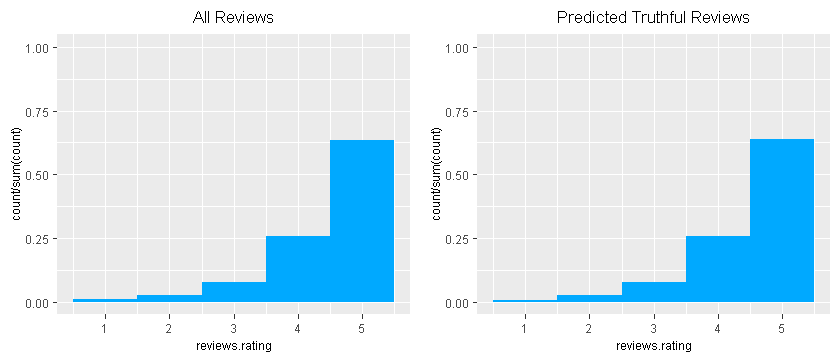

In [39]:
grid.arrange(ggplot(data.test) + ggtitle("All Reviews") + ylim(0,1) +
             geom_histogram(aes(x=reviews.rating, y=stat(count/sum(count))), bins=5),
             
             ggplot(data.test.truthful) + ggtitle("Predicted Truthful Reviews") + ylim(0,1) +
             geom_histogram(aes(x=reviews.rating, y=stat(count/sum(count))), bins=5),
            
             nrow=1)

In [40]:
data.frame(all.poor_reviews=length(which(data.test$reviews.rating<=3))/nrow(data.test),
           truthful.poor_reviews=length(which(data.test.truthful$reviews.rating<=3))/nrow(data.test.truthful))

all.poor_reviews,truthful.poor_reviews
0.1105485,0.1049672


## <font color='orange'>  Conclusions </font>
* If you look at our last two visualizations, we can easily say that the hotel does not have deceptive reviews.
* The Alexandrian should NOT invest in resolving deceptive reviews.
* Determining the deceptive reviews allows us to lower the cost of addressing bad reviews by real customers. It allows us to only invest time and company money on real custumers with bad experiences in the business services.
* Disregarding the deceptive reviews causes high churn rate in the potential custumer pool, therefore lowering the number of potential custumers of the business.

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised April 20, 2020
</span>
</p>
</font>